# DengAI: Project outline

This data project is about predicting disease spread using environmental data as well as historic numbers for reported cases.

*Background:*

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America.

Goal definition:

*The goal of the project is to predict the total_cases label for each (city, year, weekofyear) from the given test data set.*

## The Big Picture

A solution to this problem could help medical service providers in SJ and IQ to handle the disease: reducing response time, providing vaccine in time, as well as antibiotics and the hospital capacity to treat the disease.

According to WHO, such methods are already employed for diseases that have epidemic potential:
http://www.who.int/globalchange/publications/oeh0401/en/index4.html

The problem should be addressed using offline supervised learning. Performance of the model will be evaluated by the mean absolute error to the actual # of reported cases.

*Assumptions:*

* climate data can be used to predict mosquito populations

Evidence:

*Research indicates that the daily mean temperature and the variation in temperature are two of the most important drivers of the current distribution and incidence of dengue. Precipitation and precipitation extremes, whether associated with drought or excess rainfall, also affect mosquito abundance and arbovirus incidence. Studies generally project that, as temperatures continue to rise and precipitation patterns change, opportunities are increasing for further geographical expansion of Aedes vectors and of dengue.*

Ebi, K. L., & Nealon, J. (2016). Dengue in a changing climate. Environmental research, 151, 115-123.


## Data Dictionary:

There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. The goal is to make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. 
The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

**City and date indicators:** 

*= These values are important for labeling. Strings may need to be converted to numbers, eg city labels 0 and 1.*

city – City abbreviations: sj for San Juan and iq for Iquitos

week_start_date – Date given in yyyy-mm-dd format

**NOAA's GHCN daily climate data weather station measurements:** 

*= Max and min temp are restricting factors for breeding. Avg temp and total precip are the most important predictors of mosquito population.*

station_max_temp_c – Maximum temperature

station_min_temp_c – Minimum temperature

station_avg_temp_c – Average temperature

station_precip_mm – Total precipitation

station_diur_temp_rng_c – Diurnal temperature range

**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale):**

*= Sattelite Precipitation in mm*

precipitation_amt_mm – Total precipitation

**NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale):**

*= Reanalysis is processed data from NOAA*

reanalysis_sat_precip_amt_mm – Total precipitation

reanalysis_dew_point_temp_k – Mean dew point temperature

reanalysis_air_temp_k – Mean air temperature

reanalysis_relative_humidity_percent – Mean relative humidity

reanalysis_specific_humidity_g_per_kg – Mean specific humidity

reanalysis_precip_amt_kg_per_m2 – Total precipitation

reanalysis_max_air_temp_k – Maximum air temperature

reanalysis_min_air_temp_k – Minimum air temperature

reanalysis_avg_temp_k – Average air temperature

reanalysis_tdtr_k – Diurnal temperature range

**Satellite vegetation: Normalized difference vegetation index (NDVI) from NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale):**

*= Describes proportion of green space on 1 km^2 NE, SW, NE and NW of the city. This could be relevant, because forests store humidity, which is key for mosquito breeding.* 

ndvi_se – Pixel southeast of city centroid

ndvi_sw – Pixel southwest of city centroid

ndvi_ne – Pixel northeast of city centroid

ndvi_nw – Pixel northwest of city centroid

**And finally: the label data**

Number of reported cases per week and city


In [1]:
# imports
import pandas as pd

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
# combine dataframes
df = df1.join(df3)

# get an overview of the data
print(df[4:26].describe())

         year  weekofyear    ndvi_ne    ndvi_nw    ndvi_se    ndvi_sw  \
count    22.0   22.000000  16.000000  22.000000  22.000000  22.000000   
mean   1990.0   32.500000   0.173996   0.171486   0.209780   0.203135   
std       0.0    6.493587   0.060205   0.094858   0.063476   0.066446   
min    1990.0   22.000000   0.072500   0.064333   0.123400   0.123600   
25%    1990.0   27.250000   0.125000   0.090512   0.165246   0.154126   
50%    1990.0   32.500000   0.180692   0.170250   0.202257   0.191464   
75%    1990.0   37.750000   0.204400   0.208856   0.253536   0.240773   
max    1990.0   43.000000   0.291600   0.437100   0.379700   0.381357   

       precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count             22.000000              22.000000              22.000000   
mean              53.210000             299.877403             299.958442   
std               47.346562               0.501791               0.515110   
min                3.480000       

### Missing values:

In [3]:
# imports
import pandas as pd

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the % of missing points in columns 4 to 26
missing_values_percent = (missing_values_count[4:25]/len(df.index)) * 100
print(missing_values_percent)

ndvi_ne                                  13.383665
ndvi_nw                                   3.637612
ndvi_se                                   1.578586
ndvi_sw                                   1.578586
precipitation_amt_mm                      0.960879
reanalysis_air_temp_k                     0.754976
reanalysis_avg_temp_k                     0.754976
reanalysis_dew_point_temp_k               0.754976
reanalysis_max_air_temp_k                 0.754976
reanalysis_min_air_temp_k                 0.754976
reanalysis_precip_amt_kg_per_m2           0.754976
reanalysis_relative_humidity_percent      0.754976
reanalysis_sat_precip_amt_mm              0.960879
reanalysis_specific_humidity_g_per_kg     0.754976
reanalysis_tdtr_k                         0.754976
station_avg_temp_c                        3.019904
station_diur_temp_rng_c                   3.019904
station_max_temp_c                        1.441318
station_min_temp_c                        1.029513
station_precip_mm              

### ndvi_ne could be removed...

### Boxplots for outlier discovery:

AxesSubplot(0.125,0.125;0.775x0.755)


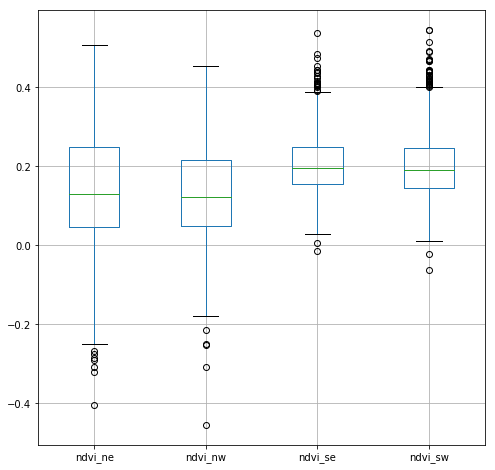

In [37]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select pixel vegetation data
df1 = df_train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(8, 8), layout=None, return_type=None))



AxesSubplot(0.125,0.125;0.775x0.755)


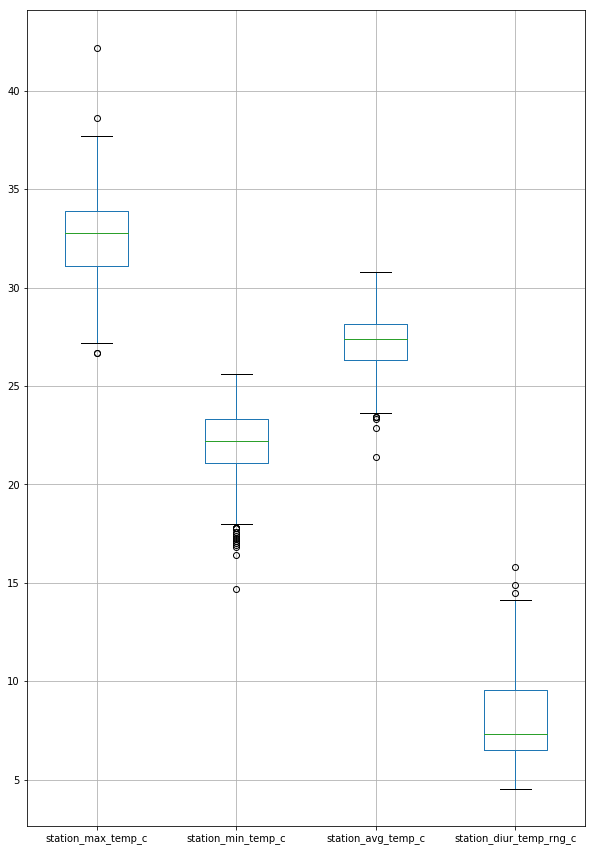

In [26]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select weather station data
df1 = df_train[['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', 'station_diur_temp_rng_c']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(10, 15), layout=None, return_type=None))

AxesSubplot(0.125,0.125;0.775x0.755)


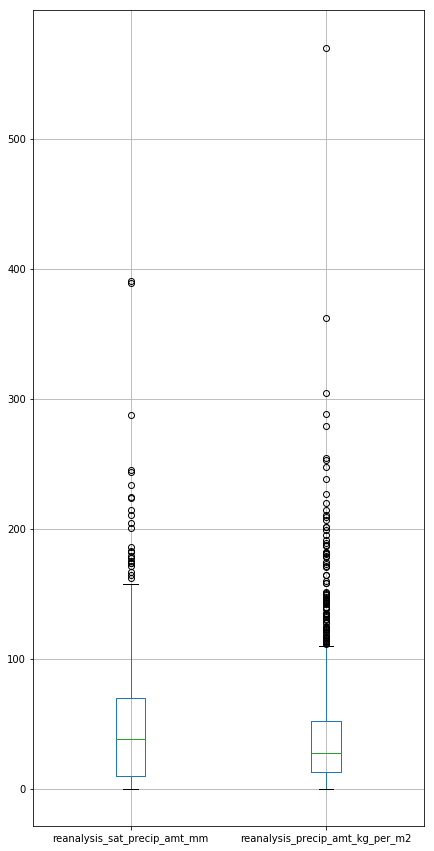

In [25]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select processed weather station data
df1 = df_train[['reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(7, 15), layout=None, return_type=None))


AxesSubplot(0.125,0.125;0.775x0.755)


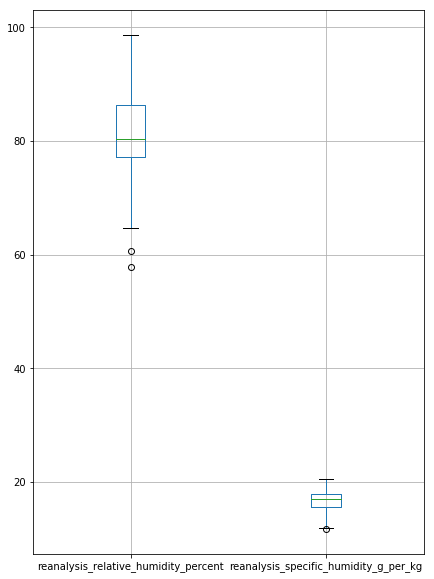

In [24]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select processed weather station data (humidity)
df1 = df_train[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(7, 10), layout=None, return_type=None))

AxesSubplot(0.125,0.125;0.775x0.755)


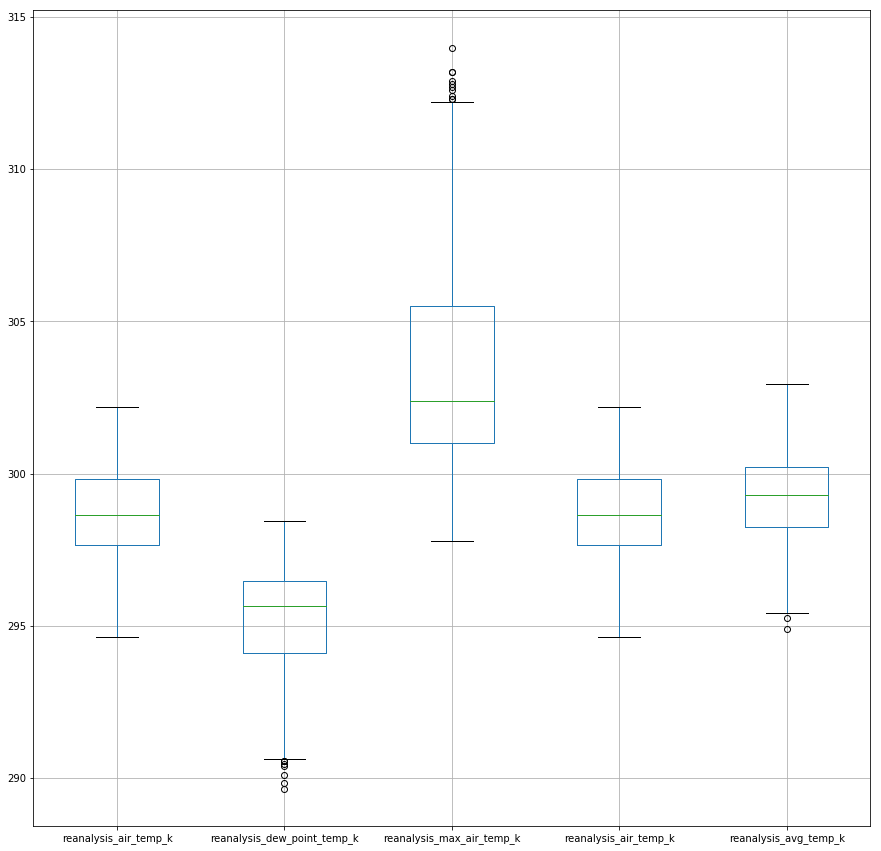

In [20]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select weather station processed temperature data
df1 = df_train[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(15, 15), layout=None, return_type=None)) 

AxesSubplot(0.125,0.125;0.775x0.755)


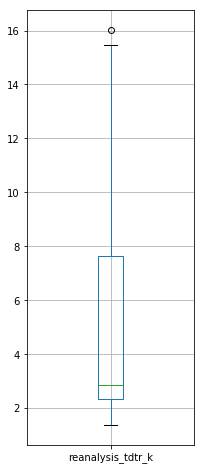

In [22]:
# import pandas 
import pandas as pd

# (including string columns, but reducing rows to 1457 - the actual size of our table)
df_train = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)

# select processed diurnal temperature data
df1 = df_train[['reanalysis_tdtr_k']]

# plot
print(df1.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(3, 8), layout=None, return_type=None)) 

AxesSubplot(0.125,0.125;0.775x0.755)


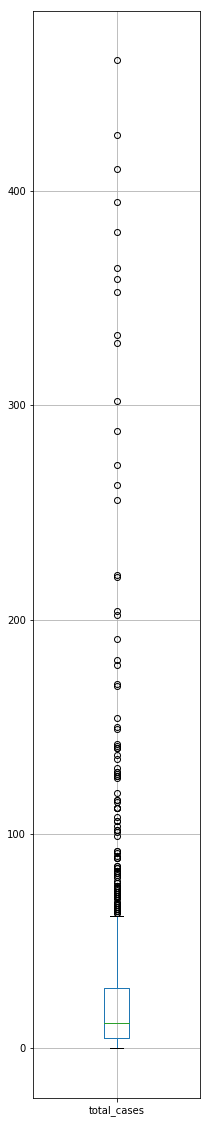

In [21]:
# import pandas
import pandas as pd

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# select reported cases
df0 = df[['total_cases']]

# plot
print(df0.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(3, 20), layout=None, return_type=None)) 

### Remove outliers? 

* remove NaN but keep rows with 0 values (eg 0 mm precipitation is not a false value)
* possibly clear ndvi Satellite Vegetation data (many outliers)
* when it comes to temperature and precipitation the outliers are potentially the strongest influencing factors on mosquito breeding - so removing them would be a mistake.

### Remove outliers? 

* remove NaN but keep rows with 0 values (eg 0 mm precipitation is not a false value)
* possibly clear ndvi Satellite Vegetation data (many outliers)
* when it comes to temperature and precipitation the outliers are potentially the strongest influencing and limiting factors for mosquito breeding. 

Removing them would be a mistake!

### What about correlation?

In [1]:
# import pandas
import pandas as pd

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# compute correlation of all the column paris, excluding NaN/0 values
print(df.corr(method='pearson', min_periods=1))

                                           year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.223361   
weekofyear                            -0.071649    1.000000  0.053548   
ndvi_ne                                0.223361    0.053548  1.000000   
ndvi_nw                                0.144345    0.048759  0.850902   
ndvi_se                                0.234234    0.121557  0.614380   
ndvi_sw                                0.277759    0.068701  0.669504   
precipitation_amt_mm                   0.205302    0.118037  0.205736   
reanalysis_air_temp_k                 -0.140016    0.425753 -0.340976   
reanalysis_avg_temp_k                  0.085043    0.463677 -0.037682   
reanalysis_dew_point_temp_k            0.132273    0.348946  0.056077   
reanalysis_max_air_temp_k              0.480402    0.238078  0.634330   
reanalysis_min_air_temp_k             -0.392351    0.179679 -0.623116   
reanalysis_precip_amt_kg_per_m2        0.132625    

### Most promising data (correlation > 0.1):

ndvi ne -0.241376

ndvi nw -0.202235

ndvi se -0.168612

ndvi sw -0.196461

reanalysis air temp 0.264952

reanalysis avg temp 0.151637

re dew point temp 0.142531

re humidity % -0.132452 

reanalysis spec humidity g 0.129861 

reanalysis_tdtr_k  -0.278483

station avg temp c 0.116109

station_diur_temp_rng_c -0.237844

station min temp c 0.267109 

### The rest should be removed!


### And now, data transformations:

In [10]:
#load package
import pandas as pd

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# drop rows with NaN
df.dropna(axis='rows')
# select columns with corr > 0.1
df = df[['city','year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'total_cases']]

# quick look
df.head()


,city,year,weekofyear,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_min_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,station_min_temp_c,total_cases
0,sj,1990.0,18.0,0.103725,0.198483,0.177617,297.572857,297.742857,295.9,292.414286,73.365714,14.012857,2.628571,6.900000,20.0,4.0
1,sj,1990.0,19.0,0.142175,0.162357,0.155486,298.211429,298.442857,296.4,293.951429,77.368571,15.372857,2.371429,6.371429,22.2,5.0
2,sj,1990.0,20.0,0.172967,0.157200,0.170843,298.781429,298.878571,297.3,295.434286,82.052857,16.848571,2.300000,6.485714,22.8,4.0
3,sj,1990.0,21.0,0.245067,0.227557,0.235886,298.987143,299.228571,297.0,295.310000,80.337143,16.672857,2.428571,6.771429,23.3,3.0
4,sj,1990.0,22.0,0.262200,0.251200,0.247340,299.518571,299.664286,297.5,295.821429,80.460000,17.210000,3.014286,9.371429,23.9,6.0


In [24]:
# Feature Engineering.

# imports
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import data
df1 = pd.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# drop rows with NaN
df.dropna(inplace=True)

# select columns with corr > 0.1
df_clean_relevant = df[['city','year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'total_cases']]

# split into input and output dataframes
x = df_clean_relevant.drop(['city','year', 'weekofyear', 'total_cases'], axis=1)
y = df_clean_relevant['total_cases']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=1)

# scaling x_train
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)

# scaling x_train
scaler = MinMaxScaler(feature_range=(-1, 1))
X_test = scaler.fit_transform(X_test)

# check scaling
np.set_printoptions(precision=3)
print(X_train[0:5,:])

[[ 0.279 -0.461 -0.3    0.136  0.048  0.662  0.386  0.203  0.235 -0.938
  -0.574  0.486]
 [ 0.181 -0.294 -0.064  0.42   0.333  0.723  0.457  0.033  0.313 -0.854
  -0.592  0.688]
 [ 0.483 -0.042 -0.161  0.001  0.36   0.277  0.636  0.665  0.568  0.05
   0.352  0.064]
 [ 0.744  0.099  0.33  -0.078  0.114  0.2    0.787  0.89   0.735 -0.299
  -0.269  0.339]
 [ 0.032 -0.185 -0.33   0.537  0.453  0.785  0.593  0.072  0.465 -0.92
  -0.564  0.578]]


In [25]:
# imports
from sklearn.svm import SVR

# Create the model
svm_poly_reg = SVR(kernel="poly", degree=4, C=100, epsilon=0.1)
# Fit the model on the training data
svm_poly_reg.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_poly_reg.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test))
print('SVR Performance on the test set: MAE = %0.4f' % mae)

SVR Performance on the test set: MAE = 13.0886


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X_train, y_train)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 20.9977


In [24]:
#sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm, model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [25]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),

    #Gaussian Processes
    gaussian_process.GaussianProcessRegressor(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.RidgeCV(),
    linear_model.SGDRegressor(),
    linear_model.Perceptron(),
    
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    
    #SVM
    svm.SVR(),
    svm.NuSVR(),
    svm.LinearSVR(),
    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    ]

In [29]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MAE'] = np.mean(abs(predicted - y_test))

    row_index+=1
    
MLA_compare.sort_values(by = ['MAE'], ascending = True, inplace = True)    
MLA_compare

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochas

,MLA Name,MAE
12,SVR,13.306310
14,LinearSVR,13.693848
13,NuSVR,14.468069
11,KNeighborsRegressor,14.810000
7,PassiveAggressiveRegressor,15.040671
9,SGDRegressor,17.414871
6,LogisticRegressionCV,18.050000
2,ExtraTreesRegressor,18.443333
4,RandomForestRegressor,20.121667
10,Perceptron,20.658333
